In [1]:
#!pip install pandas numpy matplotlib seaborn sklearn pyod

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [3]:
data = pd.read_csv('Classification/all_files_globalv1.csv')

# Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trackAppearanceCount   76382 non-null  int64  
 1   artistAppearanceCount  76382 non-null  int64  
 2   rank                   76382 non-null  int64  
 3   uri                    76382 non-null  object 
 4   artist_names           76382 non-null  object 
 5   track_name             76382 non-null  object 
 6   source                 76382 non-null  object 
 7   peak_rank              76382 non-null  int64  
 8   previous_rank          76382 non-null  int64  
 9   weeks_on_chart         76382 non-null  int64  
 10  streams                76382 non-null  int64  
 11  End Date               76382 non-null  object 
 12  Week                   76382 non-null  int64  
 13  Year                   76382 non-null  int64  
 14  End Date Dt            76382 non-null  object 
 15  Se

In [5]:
# compute the mean value of all numeric columns in data
world_yearly_median = data.select_dtypes(include=np.number).median()
world_median_data = pd.DataFrame(world_yearly_median[:-1])
world_median_data

,0
trackAppearanceCount,1.500000e+01
artistAppearanceCount,9.500000e+01
rank,1.010000e+02
peak_rank,2.400000e+01
previous_rank,8.200000e+01
weeks_on_chart,1.600000e+01
streams,7.611817e+06
Week,2.600000e+01
Year,2.020000e+03
Seconds since Epoch,1.597882e+09


In [6]:
# reset index and name columns
world_median_data.reset_index(inplace=True)
world_median_data.columns = ['year', 'median']


In [7]:
world_median_data.describe()

,median
count,1.300000e+01
mean,1.234997e+08
std,4.430016e+08
min,0.000000e+00
25%,1.500000e+01
50%,2.600000e+01
75%,1.010000e+02
max,1.597882e+09


In [11]:
percentile_95 = np.percentile(world_median_data['median'], 95)
percentile_5 = np.percentile(world_median_data['median'], 5)

greater_than_95 = (world_median_data[['median']] > percentile_95)
smaller_than_5 = (world_median_data[['median']] < percentile_5)

# create column named colors to store the color of each point based on the condition above 
# world_median_data['colors'] = np.where(greater_than_95,'r', np.where(smaller_than_5,'r','b'))

world_median_data

,year,median
0,trackAppearanceCount,1.500000e+01
1,artistAppearanceCount,9.500000e+01
2,rank,1.010000e+02
3,peak_rank,2.400000e+01
4,previous_rank,8.200000e+01
5,weeks_on_chart,1.600000e+01
6,streams,7.611817e+06
7,Week,2.600000e+01
8,Year,2.020000e+03
9,Seconds since Epoch,1.597882e+09


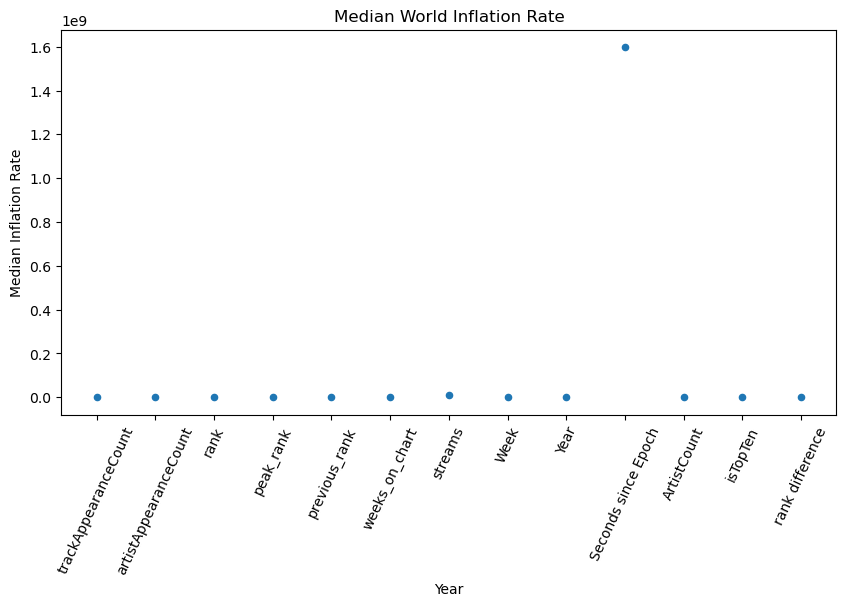

In [13]:
# plot scatter plot of the data with colors based on colors column
ax = world_median_data.plot.scatter(x='year', 
                               y='median', 
#                                c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                               figsize=(10, 5),
                               title='Median World Inflation Rate',
                               xlabel='Year',
                               ylabel='Median Inflation Rate')

plt.xticks(rotation=65);

# Benchmark Linear Regression model 

In [27]:
from sklearn.linear_model import LinearRegression

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(data[['Year', 'rank', 'trackAppearanceCount', 'artistAppearanceCount']], data[['weeks_on_chart']])

LinearRegression()

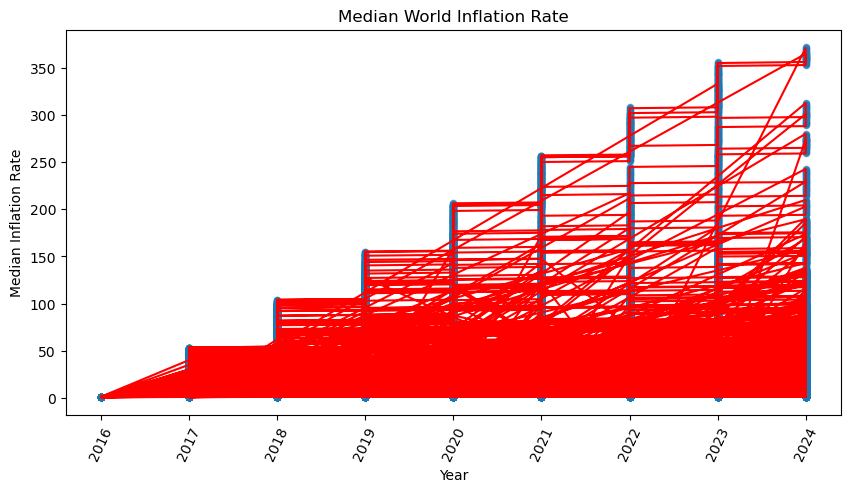

In [28]:
# How would a benchmark linear regression model perform?
ax = data.plot.scatter(x='Year', y='weeks_on_chart', 
#                             c=world_median_data['colors'].apply(lambda x: dict(r='red', b='blue')[x]), 
                            alpha=.6, figsize=(10, 5),
                            title='Median World Inflation Rate',
                            xlabel='Year', ylabel='Median Inflation Rate')

reg_prediction = LinearRegression_model.predict(data[['Year', 'rank','trackAppearanceCount', 'artistAppearanceCount']])
ax.plot(data['Year'], reg_prediction, c='r')
plt.xticks(rotation=65);

In [38]:
reg_pred_list = []
for val in reg_prediction:
    reg_pred_list.append(val[0])
# print(reg_pred_list)#, data['weeks_on_chart'].tolist()

In [42]:
resdf = data[["Year", 'weeks_on_chart']]
resdf['predictions'] = reg_pred_list

C:\Users\User\AppData\Local\Temp\ipykernel_28852\4176722534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resdf['predictions'] = reg_pred_list


In [43]:
resdf

,Year,weeks_on_chart,predictions
0,2024,1,1.257929
1,2024,2,2.426898
2,2024,1,1.451149
3,2024,1,1.247591
4,2024,2,2.295543
...,...,...,...
76377,2022,43,43.352871
76378,2022,44,44.405061
76379,2022,45,45.379456
76380,2022,46,46.353850


# Isolation Forest

In [44]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(.05))

In [45]:
model_IF.fit(world_median_data[['median']])
world_median_data['IF_anomaly_scores'] = model_IF.decision_function(world_median_data[['median']])
world_median_data['IF_anomaly'] = model_IF.predict(world_median_data[['median']])
world_median_data.head()

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,year,median,IF_anomaly_scores,IF_anomaly
0,trackAppearanceCount,15.0,0.449495,1
1,artistAppearanceCount,95.0,0.376112,1
2,rank,101.0,0.371526,1
3,peak_rank,24.0,0.449835,1
4,previous_rank,82.0,0.394288,1


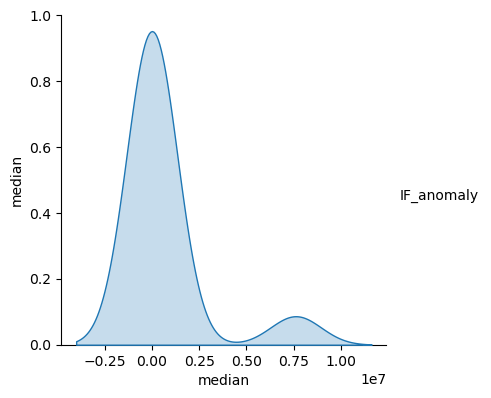

In [46]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(world_median_data, 
             vars=['median'], 
             hue='IF_anomaly', 
             palette=palette,
             height=4);

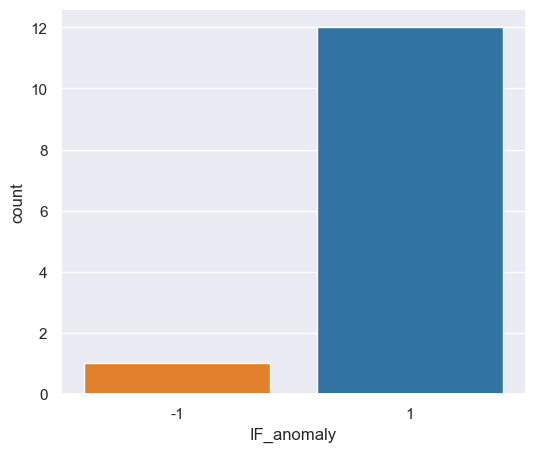

In [47]:
# phow many anomalies were detected by isolation forest?
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6, 5)})
sns.countplot(x='IF_anomaly', 
              data=world_median_data, 
              palette=palette);

# Local Outlier Factor

In [48]:
from sklearn.neighbors import LocalOutlierFactor 

# note how predictions changes when we change the contamination and/or n_neighbors parameters
model_LOF = LocalOutlierFactor(n_neighbors=10)

In [49]:
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

LOF_predictions = model_LOF.fit_predict(world_median_data[['median']])
n_errors = (LOF_predictions != 1).sum()
model_LOF_scores = model_LOF.negative_outlier_factor_

In [52]:
LOF_predictions

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1])

In [50]:
world_median_data['LOF_anomaly_scores'] = model_LOF_scores
world_median_data['LOF_anomaly'] = LOF_predictions
world_median_data.describe()

,median,IF_anomaly_scores,IF_anomaly,LOF_anomaly_scores,LOF_anomaly
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000
mean,1.234997e+08,0.336672,0.846154,-55921.199979,0.692308
std,4.430016e+08,0.174829,0.554700,200475.502149,0.751068
min,0.000000e+00,-0.076323,-1.000000,-723134.706219,-1.000000
25%,1.500000e+01,0.371526,1.000000,-1.003441,1.000000
50%,2.600000e+01,0.431216,1.000000,-0.999511,1.000000
75%,1.010000e+02,0.449386,1.000000,-0.998293,1.000000
max,1.597882e+09,0.449944,1.000000,-0.998182,1.000000


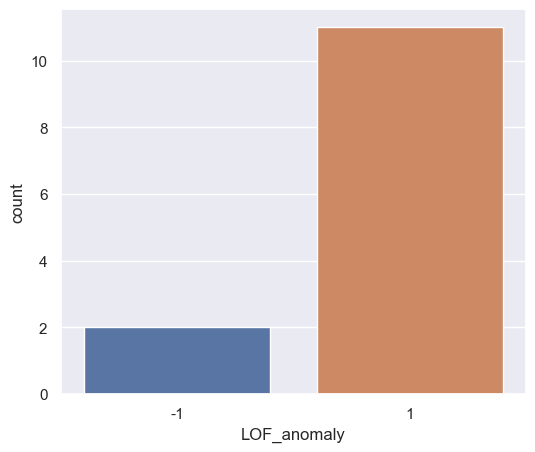

In [51]:
# phow many anomalies were detected by Local Outlier Factor?
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6, 5)})
sns.countplot(x='LOF_anomaly', 
              data=world_median_data);

# Model Visual Comparison

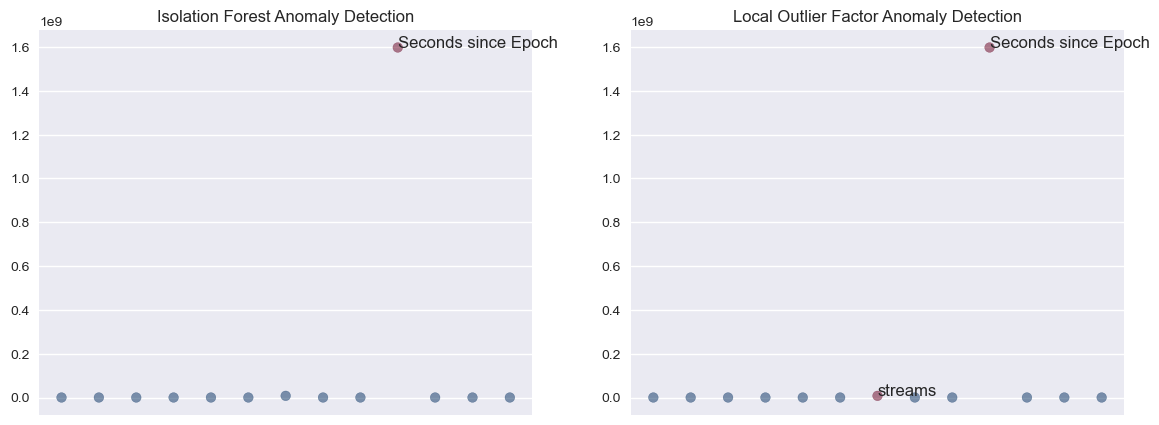

In [53]:
plt.style.use("seaborn")

# Plot two scatterplots coloring by the two different anomaly predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=False)

ax1.scatter(world_median_data['year'], 
            world_median_data['median'], 
            c=world_median_data['IF_anomaly'], 
            cmap='RdBu', 
            alpha=0.5
            )

ax1.set_title("Isolation Forest Anomaly Detection")

# label anomalies in ax1 with year value
for anomaly in world_median_data[world_median_data['IF_anomaly'] == -1]['year']:
    ax1.annotate(anomaly, 
                 xy=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median']),
                 xytext=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median'] + 0.4))

ax2.scatter(world_median_data['year'], 
            world_median_data['median'], 
            c=world_median_data['LOF_anomaly'], 
            cmap='RdBu', 
            alpha=0.5
            )

ax2.set_title("Local Outlier Factor Anomaly Detection")

for anomaly in world_median_data[world_median_data['LOF_anomaly'] == -1]['year']:
    ax2.annotate(anomaly, 
                 xy=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median']),
                 xytext=(anomaly, world_median_data[world_median_data['year'] == anomaly]['median'] + 0.2))

# hide x axis labels from axes
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
